
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 1 - Local Search <br>
<font color=696880 size=4>
Ali Aghayari


____

# Personal Data

In [1]:
# Set your student number
student_number = '400101861'
Name = 'ahmadreza'
Last_Name = 'majlesara'

# Rules

<font color=red>
Please run all the cells.
</font>

# Libraries

In [27]:
!pip install tsp_solver2


In [4]:
# import libraries here
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import time
import itertools
from tsp_solver.greedy import solve_tsp


# Q1: TSP problem

## Problem Definition

Consider the Euclidean  [Traveling Salesperson Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem):</br>
- In this problem, we are considering a country with n cities that are randomly placed; our country is a 1000 by 1000 square; we want to find the shortest tour for this country using their coordinates.
- A tour is a cycle that passes each city precisely one time.
- In this notebook we will develop some solutions to the problem, and more generally show how to think about solving a problem like this.



## Problem Representation (20 Points)

 We want to create our problem structure and present some valuable methods in this part.
 - init: choose your problem structure and create the variables accordingly.
 - distance: take two cities and return the distance between them.
 - tour length: get a tour and return the length of the given tour.
 - The shortest tour: get a set of tours and return the shortest one.
 - plot tour: get a tour and plot tour of the country.
 - nearest_neighbor: get a semi-tour and return to the nearest city to the last element you have yet to visit.

In [5]:
class TSP:
  def __init__(self, num_cities, cities = None):
        self.num_cities = num_cities
        # if cities is None --> create randomly placed cities with respect to num_cities
        if cities is None:
            cities = []
            for i in range(num_cities):
                # note : city axis values can be from 0 to 1000
                x = random.randint(0, 1000)
                y = random.randint(0, 1000)
                if (x, y) not in cities:
                    cities.append((x, y))
                else:
                    i -= 1
            self.cities = cities
        #else --> use the given data
        else:
            self.cities = cities
            self.num_cities = len(cities)
        self.distances = self.generate_distance_matrix()

  def distance(self, A, B):
        # return distance between city with index/number A and B in cities array
        city_A = self.cities[A]
        city_B = self.cities[B]
        return ((city_A[0] - city_B[0]) ** 2 + (city_A[1] - city_B[1]) ** 2) ** 0.5


  def tour_length(self, tour):
        # get the list of cities and return the tour length
        length = 0
        for i in range(len(tour) - 1):
            length += self.distance(tour[i], tour[i+1])
        length+= self.distance(tour[-1], tour[0])
        return length


  def shortest_tour(self, tours):
        # get a list of toues and return : shortest_tour, shortest_length
        shortest_length = self.tour_length(tours[0])
        shortest_tour = tours[0]
        for tour in tours:
            tour_length = self.tour_length(tour)
            if tour_length < shortest_length:
                shortest_length = tour_length
                shortest_tour = tour
        return shortest_tour, shortest_length

  def plot_tour(self, tour):
        #  tour will be given an its expected to plot a good representation of the tour and cities
        x = [city[0] for city in self.cities]
        y = [city[1] for city in self.cities]
        plt.plot(x, y, 'bo', label = 'cities')
        for i in range(len(tour) - 1):
            city_A = self.cities[tour[i]]
            city_B = self.cities[tour[i+1]]
            plt.plot([city_A[0], city_B[0]], [city_A[1], city_B[1]], 'b-')
        city_A = self.cities[tour[-1]]
        city_B = self.cities[tour[0]]
        plt.plot([city_A[0], city_B[0]], [city_A[1], city_B[1]], 'b-')
        plt.title('Tour')
        plt.xlabel('x coordinate')
        plt.ylabel('y coordinate')
        plt.grid('True','both')
        plt.minorticks_on()
        plt.show()


  def plot2tours(self, tour1, tour2, firststring, secondtring,thirdstring = 'cities'):
    x = [city[0] for city in self.cities]
    y = [city[1] for city in self.cities]
    plt.plot(x, y, 'bo')

    for i in range(len(tour1) - 1):
        city_A = self.cities[tour1[i]]
        city_B = self.cities[tour1[i+1]]
        plt.plot([city_A[0], city_B[0]], [city_A[1], city_B[1]], 'b-')
    city_A = self.cities[tour1[-1]]
    city_B = self.cities[tour1[0]]
    plt.plot([city_A[0], city_B[0]], [city_A[1], city_B[1]], 'b-', label = firststring)

    for i in range(len(tour2) - 1):
        city_A = self.cities[tour2[i]]
        city_B = self.cities[tour2[i+1]]
        plt.plot([city_A[0], city_B[0]], [city_A[1], city_B[1]], 'r-')
    city_A = self.cities[tour2[-1]]
    city_B = self.cities[tour2[0]]
    plt.plot([city_A[0], city_B[0]], [city_A[1], city_B[1]], 'r-', label = secondtring)

    plt.title('Two Tours')
    plt.xlabel('x coordinate')
    plt.ylabel('y coordinate')
    plt.grid('True', 'both')
    plt.legend()
    plt.minorticks_on()
    plt.show()

  def nearest_neighbor(self, A, cities, count = None):
        # city "A" will be given and we expect
        # if count == None -->  get the nearest neighbor from the list "cities"
        # else --> we need "count" closest neighbors
        if count is None:
            count = 1
        distances = []
        # removing the city "A" from the list of cities
        cities1 = [i for i in cities if i != A]
        for i in cities1:
            distance = self.distance(A, i)
            distances.append((i, distance))
        distances.sort(key=lambda x: x[1])
        neighbors = [city[0] for city in distances[:count]]
        return neighbors
  def generate_distance_matrix(self):
    distance_matrix = np.zeros((self.num_cities, self.num_cities))
    for i in range(self.num_cities):
        for j in range(i + 1, self.num_cities):
            distance = self.distance(i, j)
            distance_matrix[i][j] = distance
            distance_matrix[j][i] = distance
    return distance_matrix

## Brute Force (5 Points)

Let's start with an algorithm that is guaranteed to solve the problem (although it is inefficient for large sets of cities) </br>
we can achieve this by generating all possible tours of the cities and choosing the shortest tour (the one with minimum tour length).

In [6]:
def generate_permutations(num_cities):
    # generate all possible permutations of numbers from start to end
    numbers = list(range(num_cities))
    perms = itertools.permutations(numbers)
    perms = [perm for perm in perms]
    return list(perms)

def alltours_tsp(tsp):
    #  generate all possible tours and return the shortest tour
    all_tours = generate_permutations(tsp.num_cities)
    shortest_tour = tsp.shortest_tour(all_tours)
    return shortest_tour

Now, try to create a country with five cities and apply your brute force function to find the shortest tour.

In [7]:
# create a country using the TSP class
tsp = TSP(5)
# run the algorithm
shortest_tour = alltours_tsp(tsp)
shortest_tour_array = shortest_tour[0]
shortest_tour_length = shortest_tour[1]
# present the answer
print('shortest tour is:' + str(shortest_tour_array))
print('shortest length :' + str(shortest_tour_length))


shortest tour is:(0, 2, 1, 3, 4)
shortest length :2296.304300440922


Visualize your answer for the TSP problem

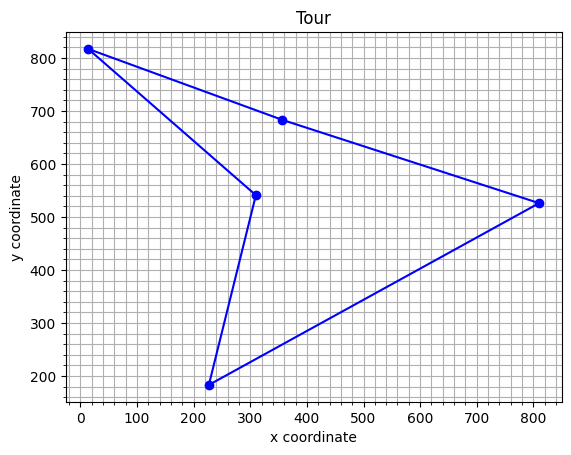

In [8]:
# plot the answer using the TSP util methods
tsp.plot_tour(shortest_tour_array)



Try this algorithm on countries with 4, 6, 8, and 10 cities and plot the time it takes to calculate the answer.

0.000129439
0.006438505
0.390042307
42.180300011
[-8.95230083 -5.04545891 -0.94150007  3.74195329]


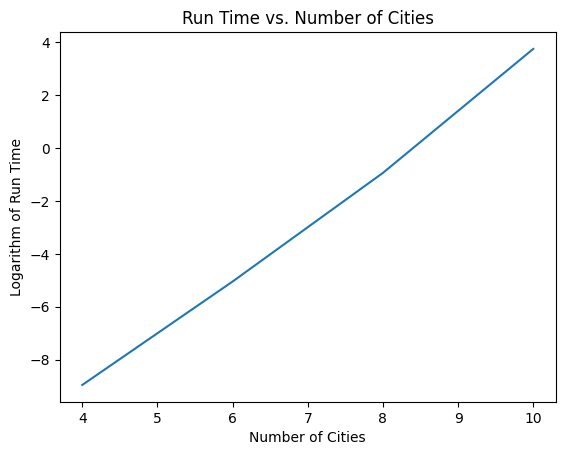

In [9]:
# create different countries
countries = [TSP(4), TSP(6), TSP(8), TSP(10)]

# run the algorithm and consider its run time
runtimes = []
for country in countries:
    start_time = time.time_ns()
    shortest_tour = alltours_tsp(country)
    end_time = time.time_ns()
    runtime = float(end_time - start_time)/(10**9)
    runtimes.append(runtime)
    print(runtime)

# plot the run times accordingly
print(np.log(runtimes))
plt.plot([4, 6, 8, 10], np.log(runtimes))
plt.title('Run Time vs. Number of Cities')
plt.xlabel('Number of Cities')
plt.ylabel('Logarithm of Run Time')
plt.show()

# note : given example is using log
# note : this block was compiled in colab. using local device can cause the time of 4 cities become 0 nd it causes error

## local Algorithms

### Initial Functions (25 Points)

We will create some functions for our initial state and use these functions for our local algorithms later.

- random initial function: Create a feasible tour randomly.

In [10]:
def random_initial(tsp):
  # create a random tour and return tour, length
  tour = list(range(tsp.num_cities))
  random.shuffle(tour)
  length = tsp.tour_length(tour)
  return tour, length

- nearest neighbor initial function: Start at any city; at each step, extend the tour by moving from the previous city to its nearest neighbor that has yet to be visited.

In [11]:
def nearest_neighbor_initial(tsp , city_A = None):
  # create a nearest neighbor tour as above and return tour, length
  if city_A is None:
      city_A = random.randint(0, tsp.num_cities - 1)
  tour = [city_A]
  cities = list(range(tsp.num_cities))
  cities.remove(city_A)
  while len(cities) > 0:
      city_B = country.nearest_neighbor(tour[-1], cities)[0]
      tour.append(city_B)
      cities.remove(city_B)
  length = country.tour_length(tour)
  return tour, length


- repeated nearest neighbor initial function : You can improve nearest neighbor algorithm by running it multiple times with different starting cities and using the best-generated answer.

In [12]:
def repeated_nearest_neighbor_initial(tsp, repetitions=None):
    tspcopy = tsp
    if repetitions is None:
        repetitions = tspcopy.num_cities
    startingCities = random.sample(range(tspcopy.num_cities), repetitions)
    best_tour, best_length= nearest_neighbor_initial(tspcopy , startingCities[0])
    for i in range(repetitions):
        tour, length = nearest_neighbor_initial(tspcopy , startingCities[i])
        if length < best_length:
            best_tour = tour
            best_length = length
    return best_tour, best_length


Now, try to create a country with 30 cities, apply your repeated_nearest_neighbor_initial function with repetitions of 1, 4, 8, 12, and compare the results.

[5851.475900918086, 5311.996900659804, 5276.606056478837, 5276.606056478837]
[5, 19, 15, 24, 29, 20, 26, 23, 0, 16, 21, 13, 7, 27, 1, 22, 11, 14, 3, 25, 12, 28, 18, 4, 17, 6, 9, 8, 2, 10]


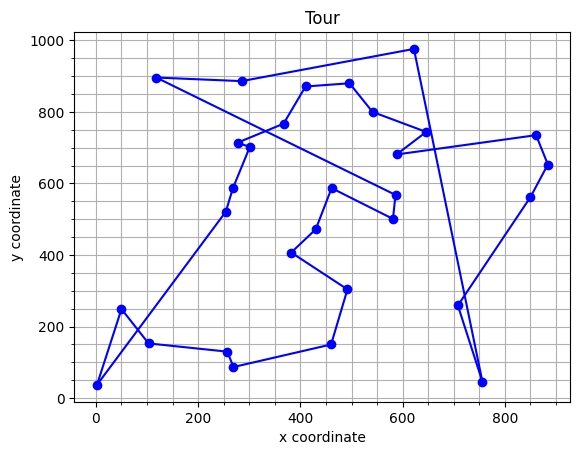

[13, 16, 21, 0, 23, 26, 20, 29, 24, 15, 5, 19, 28, 12, 25, 3, 14, 11, 1, 22, 27, 7, 2, 10, 8, 18, 4, 17, 6, 9]


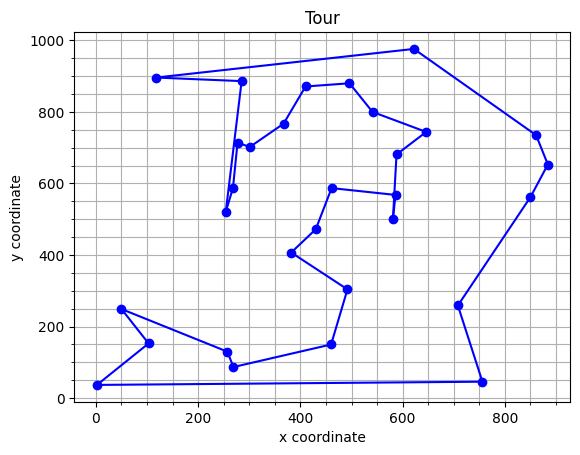

[27, 7, 29, 24, 15, 5, 19, 28, 12, 25, 3, 14, 11, 1, 22, 2, 10, 8, 18, 4, 17, 6, 9, 26, 20, 0, 23, 16, 21, 13]


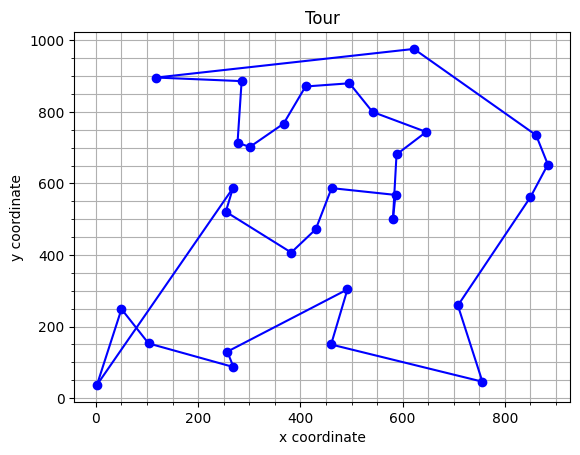

[27, 7, 29, 24, 15, 5, 19, 28, 12, 25, 3, 14, 11, 1, 22, 2, 10, 8, 18, 4, 17, 6, 9, 26, 20, 0, 23, 16, 21, 13]


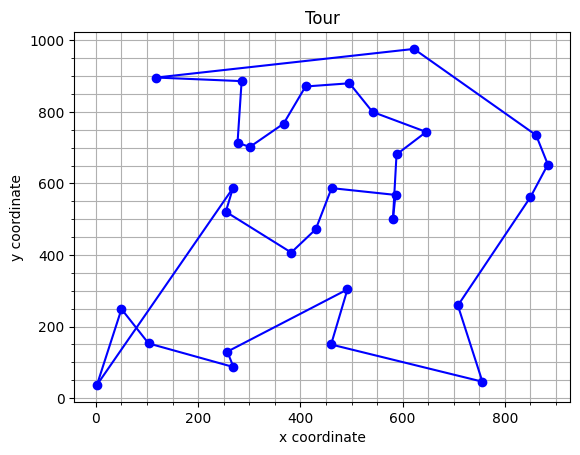

In [13]:
# create different countries
country = TSP(30)
# run the algorithm and consider its tour length
repetitions = [1,4,8,12]
lengths = []
tours = []
for repetition in repetitions:
    tour , length = repeated_nearest_neighbor_initial(country, repetition)
    lengths.append(length)
    tours.append(tour)
# plot/print the tour lengths accordingly
print(lengths)
for tour in tours:
    print(tour)
    country.plot_tour(tour)

Does repetition make our answer optimal?
**<font color="#34d5eb">as it is a greedy search the answer is no</font>**

- beam search initial function: Start with a list of n cities; at each step, extend your semi-tours by moving from their previous cities to their n nearest neighbors and then pick out n semi-tours from these generated semi-tours of length i+1

In [14]:
def beam_search_initial(tsp, n, iter):
  #  initial n starting points and name it as queue
  queue = [[random.sample(range(tsp.num_cities), 1)[0]] for i in range(n)]
  # print(queue)
  # (iter range could not be less than tsp.city_num)
  iter = max(iter, tsp.num_cities)
  # in every iter :
  for i in range(iter):
    all_possible_expansions = []
    # Expand each tour in the queue
    for tour in queue:
      unvisited_cities = set(range(tsp.num_cities)) - set(tour)
      # print(len(unvisited_cities))
      k = min(n, len(unvisited_cities))
      unvisited_cities1 = random.sample(list(unvisited_cities),k)
      # use the queue elements to create n new elements from each (new elements contain more cities)
      for city in unvisited_cities1:
        new_tour = tour + [city]
        all_possible_expansions.append(new_tour)

    # filter these n^2 elements and just use n of them and name them as queue
    all_possible_expansions.sort(key=tsp.tour_length)
    queue = all_possible_expansions[:n]

    # Break if all cities are included in the tours
    if len(queue[0]) == tsp.num_cities:
      break

  # Find the shortest tour in the final queue
  #print(queue)
  #print(len(queue))
  best_tour, best_length = tsp.shortest_tour(queue)
  return best_tour, best_length


Now, try to create a country with 30 cities, apply these initial functions, and compare the tour length of these initial tours with each other and the optimal answer (if city_num is low).

In [15]:
# create a country
country = TSP(30)
# run the needed algorithms and consider their tour length
repeated_nearest_neighbor_tour1, repeated_nearest_neighbor_length1 = repeated_nearest_neighbor_initial(country, 10)
random_tour1, random_length1 = random_initial(country)
nearest_neighbor_tour1 , nearest_neighbor_length1 = nearest_neighbor_initial(country)
beam_search_tour1, beam_search_length1 = beam_search_initial(country, 5,100)
print('random_initial_length: ' + str(random_length1))
print('nearest_neighbor_length: ' + str(nearest_neighbor_length1))
print('repeated_nearest_neighbor_length: ' + str(repeated_nearest_neighbor_length1))
print('beam_search_length: ' + str(beam_search_length1))
# note : repeated_nearest_neighbor_initial(tsp, 10) and beam_search_initial(tsp, 5, 100) are used in
# the example below; you are free to use other parameters.

random_initial_length: 17064.591432000296
nearest_neighbor_length: 5189.169923807917
repeated_nearest_neighbor_length: 4566.976236322738
beam_search_length: 7735.048149216139


Plot these tours and compare them visually.

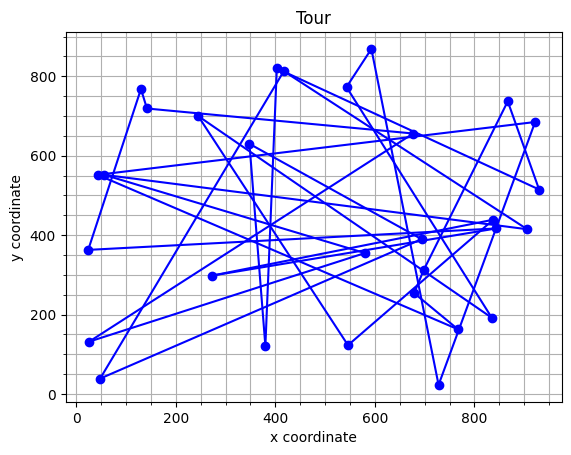

In [16]:
#  plot the tours accordingly (random)
country.plot_tour(random_tour1)

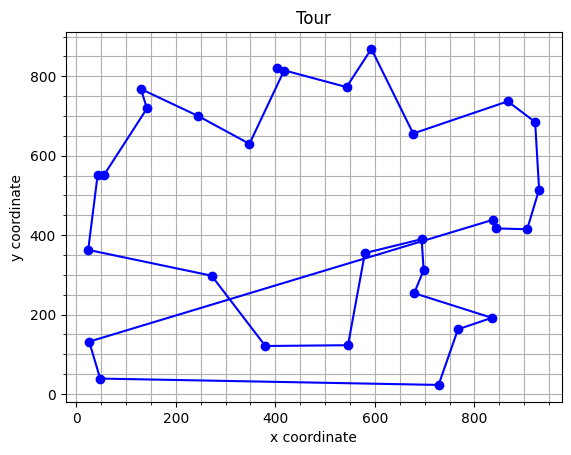

In [17]:
# plot the tours accordingly (nn)
country.plot_tour(nearest_neighbor_tour1)

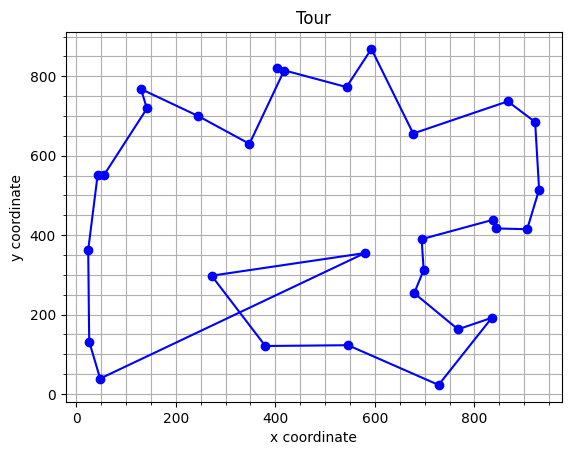

In [18]:
# plot the tours accordingly (rnn)
country.plot_tour(repeated_nearest_neighbor_tour1)

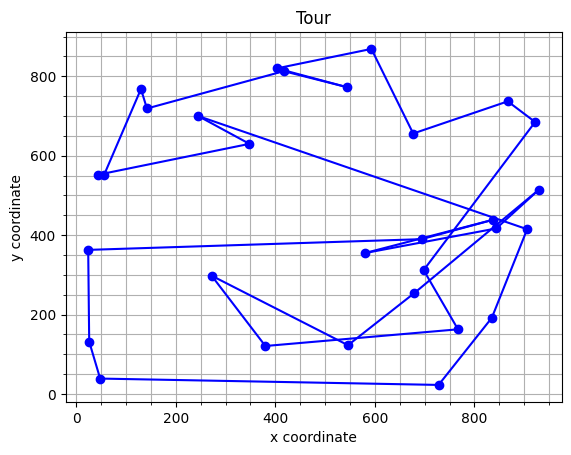

In [19]:
# plot the tours accordingly (beam)
country.plot_tour(beam_search_tour1)

### LKH (25 Points)

Implement a simplified version of [LKH](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwimj7nFoqCEAxWzh_0HHc98Df4QFnoECCQQAQ&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FLin%25E2%2580%2593Kernighan_heuristic&usg=AOvVaw0G05-wkkun1YAp6zPfWuLd&opi=89978449) for this problem.</br>
- This local search algorithm takes the initial state and improves it over time by swapping a part of the tour sequence.
- In this modified version, we will check every (i,j) pair at each iteration and reverse the tour from index "I" to index "J" if it improves our tour.


In [20]:
def lin_kernighan(tsp, initial, iterations=10):
  # init
  tour = initial[0]
  distance = initial[1]
  sameTour = 0
  # for iteration :
  for iter in range(iterations):
        # for every distinct pair of (i, j):
    for i in range(tsp.num_cities):
      for j in range(i + 2, tsp.num_cities):
        # note : reverse technique : a1 a2 a3 a4 ... a10 ----with i = 2,  j = 5 ----> a1 a5 a4 a3 a2 a6 .... a10
        new_tour = tour[0:i+1] + list(reversed(tour[i+1:j+1])) + tour[j+1:tsp.num_cities]
        new_distance = tsp.tour_length(new_tour)
        # If the reverse technique improves our tour, replace the reversed version with the actual version.
        if new_distance < distance:
          if new_tour == tour:
            sameTour = 1
          else:
            sameTour = 0
            tour = new_tour
            distance = new_distance

    if sameTour == 1:
      break

  return tour, distance

Run this algorithm on a reasonably big country and visualize it.</br>
You can use any initial state in this part.

original tour:


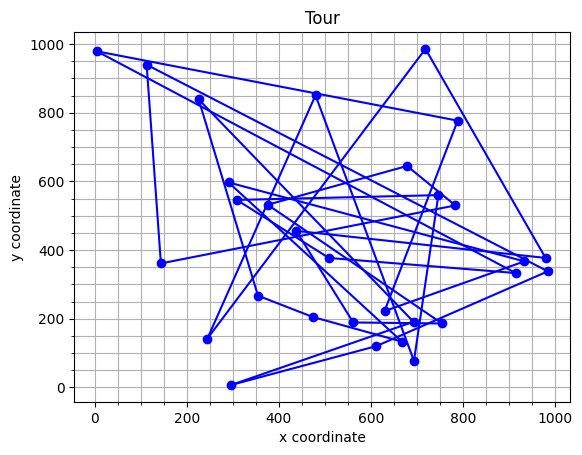

16153.736956798608
LKH output


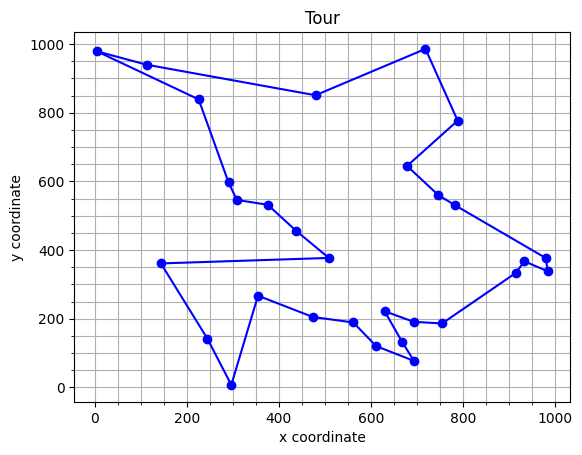

4467.491433981016


In [21]:
# create a country using the TSP class
country = TSP(30)
initial = random_initial(country)
print('original tour:')
country.plot_tour(initial[0])
print(initial[1])
# run the algorithm
tour, length = lin_kernighan(country, initial)
# plot the answer
print('LKH output')
country.plot_tour(tour)
print(length)


### Simulated Annealing (25 Points)

Implement simulated annealing for this problem.

In [22]:
def simulated_annealing(tsp, initial, initial_temperature=1000, cooling_rate=0.99, num_iterations=10000):
    #  init
    current_tour = initial[0]
    current_length = initial[1]
    best_tour = current_tour
    best_length = current_length
    temp = initial_temperature
    # for iteration :
    for iteration in range(num_iterations):
        if temp == 0:
            break
        # note : create neighbors using the reversing method,  but this time improvement is not important
        new_tour = current_tour.copy()
        i = random.randint(0, tsp.num_cities - 2)
        j = random.randint(i + 1, tsp.num_cities - 1)
        new_tour = new_tour[0:i] + list(reversed(new_tour[i:j+1])) + new_tour[j+1:tsp.num_cities]
        new_length = tsp.tour_length(new_tour)
        # accept the neighbor if it has a shorter length
        delta = current_length - new_length
        if delta > 0:
            current_tour = new_tour
            current_length = new_length
        # or with a probability
        else:
            acceptance_probability = np.exp(delta / temp)
            if random.random() < acceptance_probability:
                current_tour = new_tour
                current_length = new_length
        # update the temperature
        temp = temp*cooling_rate

    # return tour, length
    return current_tour, current_length


Run this algorithm on a reasonably big country and visualize it.</br>
You can use any initial state in this part.

original tour:


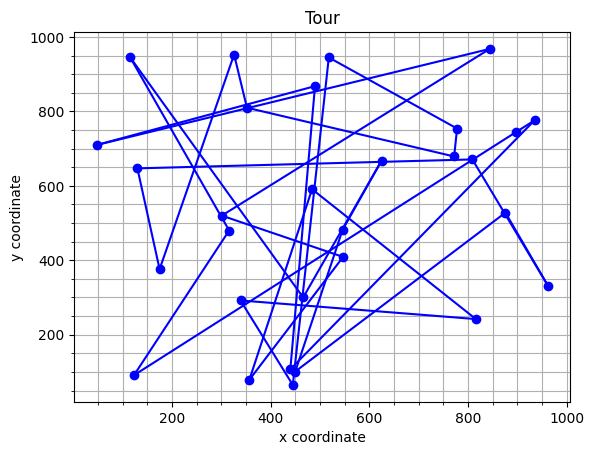

14336.021751559447
simulated annealing output:


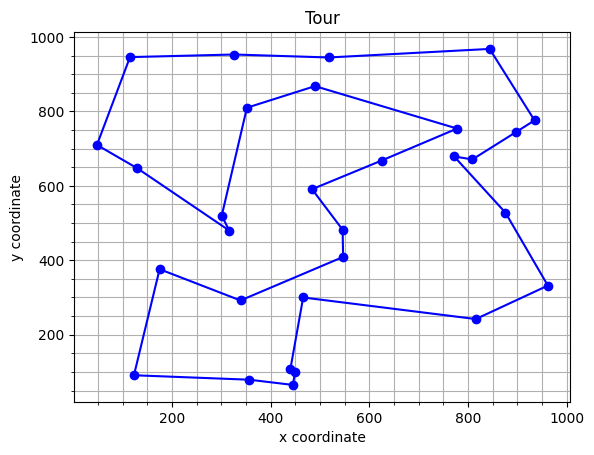

5276.770058655586


In [23]:
# create a country using the TSP class
country = TSP(30)
initial = random_initial(country)
print('original tour:')
country.plot_tour(initial[0])
print(initial[1])
# run the algorithm
tour, length = simulated_annealing(country, initial)

# plot the answer
print('simulated annealing output:')
country.plot_tour(tour)
print(length)

### Analysis

- The given code can calculate an acceptable approximated answer.
- use this code to compare your algorithms.

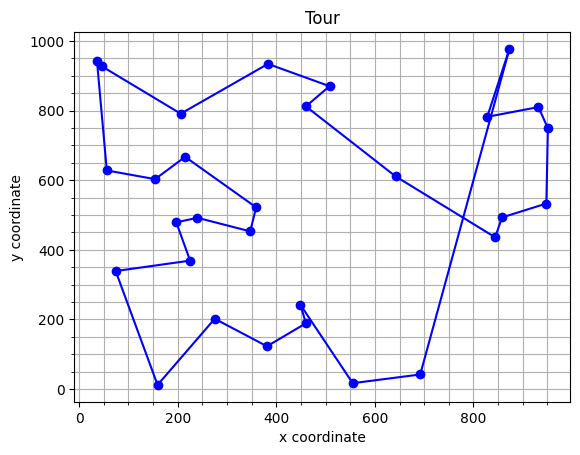

5351.397191066438


In [24]:
tsp = TSP(30)
path = solve_tsp(tsp.distances)
tsp.plot_tour(path)
print(tsp.tour_length(path))


- analyze the lengths you get from the two algorithms with different initial functions
- plot these tours and explain the results (results may be inconsistent as they are approximations)

threshold:                     5848.1013
lkh random:                    5458.3099
lkh nn:                        5221.8378
lkh repeated nn:               5217.7516
lkh beam:                      5310.3183
simulated random:              5160.0393
simulated nn:                  5267.9537
simulated repeated nn:         5519.6771
simulated beam:                5255.0073


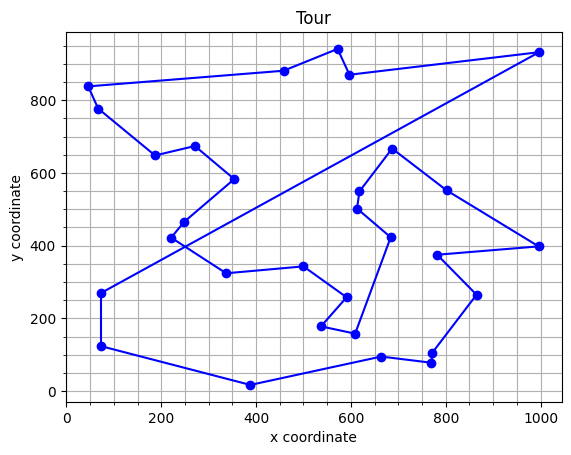

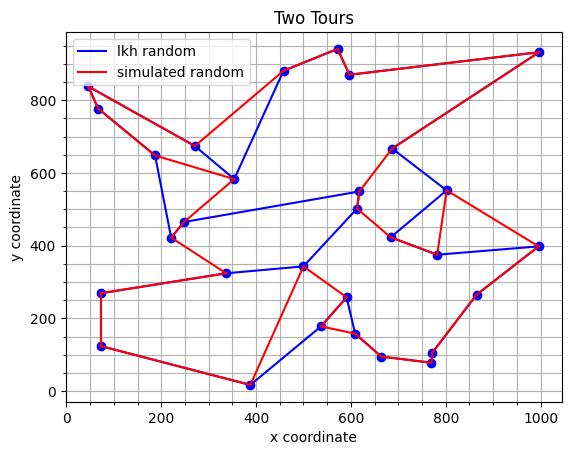

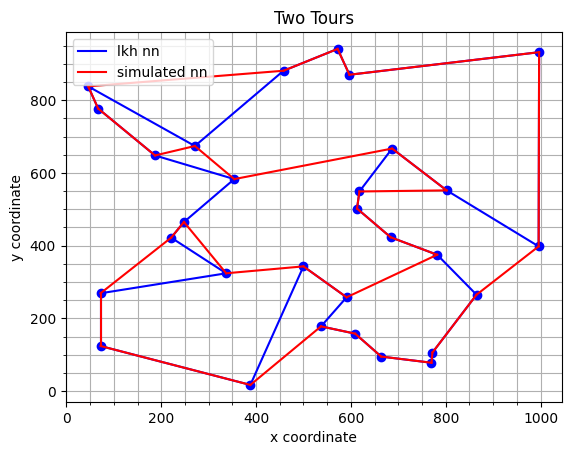

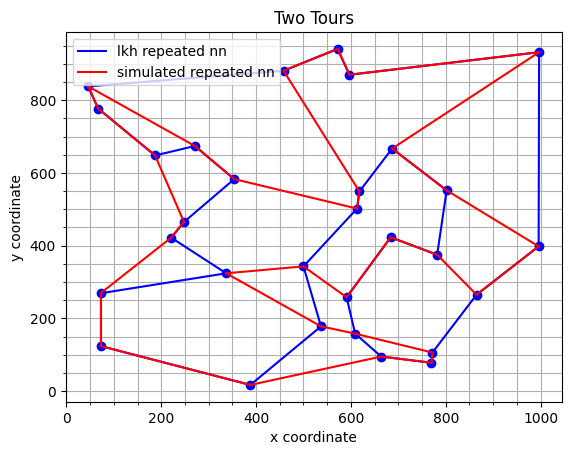

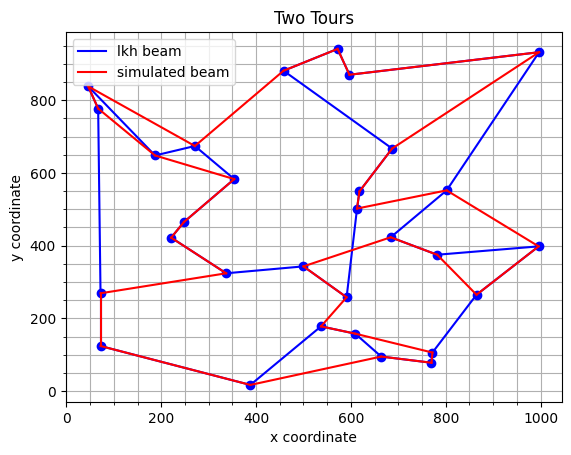

In [25]:
# test different initial functions on your two algorithms using the same TSP problem
country = TSP(30)
randominitial = random_initial(country)
nearestneighborinitial = nearest_neighbor_initial(country)
repeatednearestneighborinitial = repeated_nearest_neighbor_initial(country, 10)
beamsearchinitial = beam_search_initial(country, 5, 100)
lkhrandom = lin_kernighan(country, randominitial)
lkhnn = lin_kernighan(country, nearestneighborinitial)
lkhrepeatednn = lin_kernighan(country, repeatednearestneighborinitial)
lkhbeam = lin_kernighan(country, beamsearchinitial)
simulatedrandom = simulated_annealing(country, randominitial)
simulatednn = simulated_annealing(country, nearestneighborinitial)
simulatedrepeatednn = simulated_annealing(country, repeatednearestneighborinitial)
simulatedbeam = simulated_annealing(country, beamsearchinitial)
# also create an answer using the given library
treshhold = country.tour_length(solve_tsp(country.distances))

label_width = 25
number_width = 15

#  compare these answers numerically and visually
print(f'{"threshold:":<{label_width}}{treshhold:>{number_width}.4f}')
print(f'{"lkh random:":<{label_width}}{lkhrandom[1]:>{number_width}.4f}')
print(f'{"lkh nn:":<{label_width}}{lkhnn[1]:>{number_width}.4f}')
print(f'{"lkh repeated nn:":<{label_width}}{lkhrepeatednn[1]:>{number_width}.4f}')
print(f'{"lkh beam:":<{label_width}}{lkhbeam[1]:>{number_width}.4f}')
print(f'{"simulated random:":<{label_width}}{simulatedrandom[1]:>{number_width}.4f}')
print(f'{"simulated nn:":<{label_width}}{simulatednn[1]:>{number_width}.4f}')
print(f'{"simulated repeated nn:":<{label_width}}{simulatedrepeatednn[1]:>{number_width}.4f}')
print(f'{"simulated beam:":<{label_width}}{simulatedbeam[1]:>{number_width}.4f}')
# note : The value of the given code (threshold) is not a hard threshold!
# note : Don't forget to compare different answers by plotting; you may need to remake a plotting function
country.plot_tour(solve_tsp(country.distances))
country.plot2tours(lkhrandom[0], simulatedrandom[0], 'lkh random', 'simulated random')
country.plot2tours(lkhnn[0], simulatednn[0], 'lkh nn', 'simulated nn')
country.plot2tours(lkhrepeatednn[0], simulatedrepeatednn[0], 'lkh repeated nn', 'simulated repeated nn')
country.plot2tours(lkhbeam[0], simulatedbeam[0], 'lkh beam', 'simulated beam')
